In [7]:
import numpy as np
np.random.seed(42)
X = np.linspace(-10, 10, 100)
y = 2 + 3*X + 0.5*X**2 + np.random.normal(0, 2, len(X))

In [12]:

import matplotlib.pyplot as plt


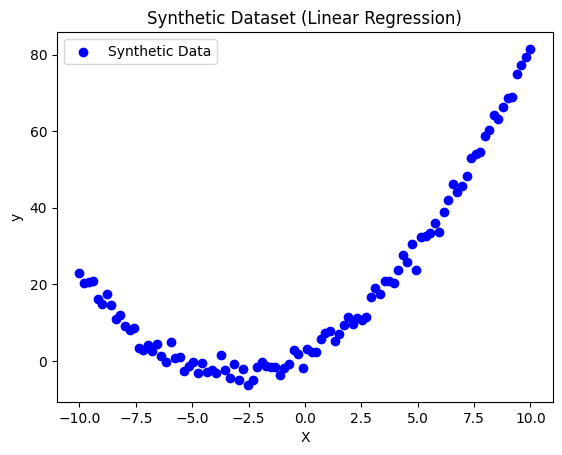

In [13]:
plt.scatter(X, y, color='blue', label='Synthetic Data')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Dataset (Linear Regression)")
plt.legend()
plt.show()

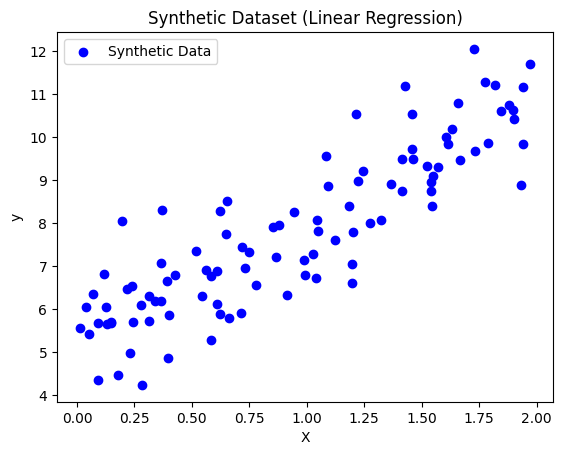

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (y = 3x + 5 + noise)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Random values between 0 and 2
y = 5 + 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# Plot the data
plt.scatter(X, y, color='blue', label='Synthetic Data')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Dataset (Linear Regression)")
plt.legend()
plt.show()

In [21]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

In [20]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        gradient = (1/m) * X.T.dot(predictions - y)
        theta -= alpha * gradient
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

In [24]:
# Add bias term (X0 = 1)
X_b = np.c_[np.ones((len(X), 1)), X]  # Shape: (100, 2)


# Initialize theta (random or zeros)
theta_initial = np.random.randn(2, 1)

# Hyperparameters
alpha = 0.1  # Learning rate
iterations = 1000

# Run Gradient Descent
theta_final, cost_history = gradient_descent(X_b, y, theta_initial, alpha, iterations)

print("Optimal Theta:", theta_final.ravel())

Optimal Theta: [5.21509611 2.77011343]


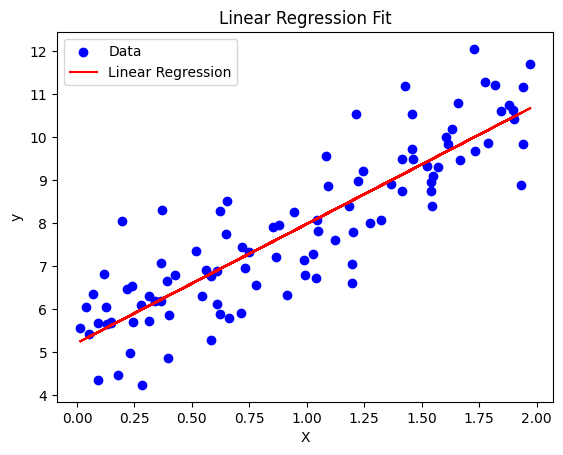

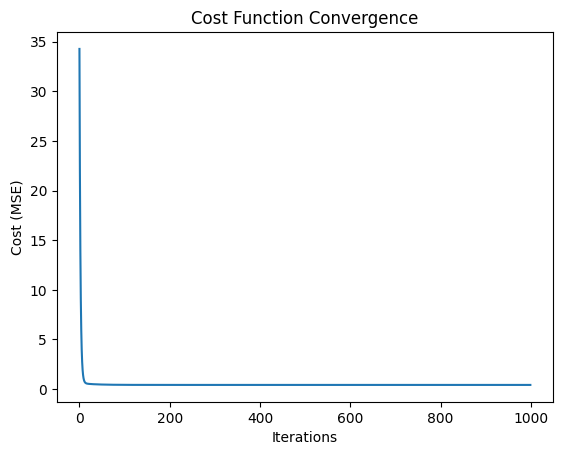

In [33]:
# Plot the regression line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, X_b.dot(theta_final), color='red', label='Linear Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# Plot cost vs. iterations (to check convergence)
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

# Split data into 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term to training and validation sets
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
X_val_b = np.c_[np.ones((len(X_val), 1)), X_val]

In [39]:
# Initialize random theta
theta_initial = np.random.randn(2, 1)

# Hyperparameters
alpha = 0.1  # Learning rate
iterations = 1000

# Run Gradient Descent on training data
theta_final, cost_history = gradient_descent(X_train_b, y_train, theta_initial, alpha, iterations)

In [47]:


train_mse = compute_cost(X_train_b, y_train, theta_final)
print(f"Training MSE: {train_mse:.4f}")

Training MSE: 0.4238


In [48]:
val_mse = compute_cost(X_val_b, y_val, theta_final)
print(f"Validation MSE: {val_mse:.4f}")

Validation MSE: 0.3268


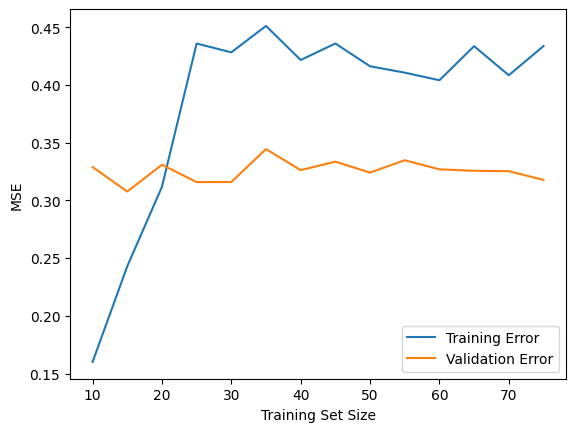

In [50]:
train_errors, val_errors = [], []
m_range = range(10, len(X_train), 5)
print(m
for m in m_range:
    theta, _ = gradient_descent(X_train_b[:m], y_train[:m], theta_initial, alpha, 100)
    train_errors.append(compute_mse(X_train_b[:m], y_train[:m], theta))
    val_errors.append(compute_mse(X_val_b, y_val, theta))

plt.plot(m_range, train_errors, label="Training Error")
plt.plot(m_range, val_errors, label="Validation Error")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()